By - Hareetima Sonkar - Group 7

# *SARCASM DETECTION USING DEEP LEARNING*

# Business Problem
Sarcasm Detection is a problem that needs to be tackled, because in situations or businesses that are reliant on sentiment analysis, finding the difference can be crucial. Most messages can be _misinterpreted_, such as “Great! You have done a good job”. 

Misinterpreting sarcasm can lead to adversely affecting businesses in various ways, such as: 

- Customer Feedback 
- Public Relations 
- Brand Reputation Management 
- Social Media Monitoring 
- Ad Campaign Analysis 
________________________________________________________________________________________________________________________________________________________

# Solution Description

### 1. Data Collection, Preprocessing & Cleaning:
1. **Data Loading**
2. **Duplicate Removal, Removing null values etc.**
3. **Data Summary**
4. **removing punctuations, stopwords, etc.**
5. **Visualizations**
6. **Descriptive Statistics**

### 2. Text Tokenization and Padding
1. **TensorFlow's Keras** (tensorflow.keras.preprocessing.text.Tokenizer)
2. Padding type = **'post'**

### 3. Model Training
1. **Model Architecture**
2. **Data Splitting**
3. **Training**
   
### 4. Model Evaluation
1. **Performance Metrics**
2. **Visualizations**

### 5. Prediction
________________________________________________________________________________________________________________________________________________________

# Dataset Description

- **Total Entries**: 909,293
- **Columns** :-
    - "label" : Indicates whether the comment is _sarcastic (1)_ or _not sarcastic (0)_.
    - "comment" : The textual comment to be analyzed for sarcasm.

	label	comment
	1	Slip rohypnol into her drink

	0	Ill have to check again but I think in the novel Snoke explicitly says that the order is older than he is

	0	according to google translate, Nullam gravida vehicula dolor translates to: No pregnant vehicles pain O.o

	0	Its the new PS4 Slim but not the PS4 Pro

	0	Cool story bro instantly makes me want to punch them
    
	1	Building 7 bro

	0	Marketing wording it gets me every time

	1	Dempster letting A Rod take first base for free

	0	Jordan 1 Shadow

	1	His wife enjoyed a burst appendix

________________________________________________________________________________________________________________________________________________________


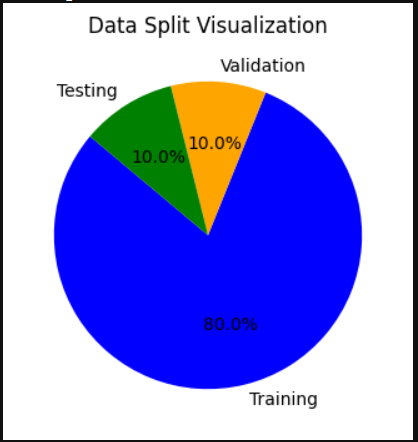

In [28]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import string 
from nltk.corpus import stopwords 
from wordcloud import WordCloud 

#importing libraries for model building and evaluation 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from sklearn.metrics import classification_report, confusion_matrix 

In [29]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('model.h5')

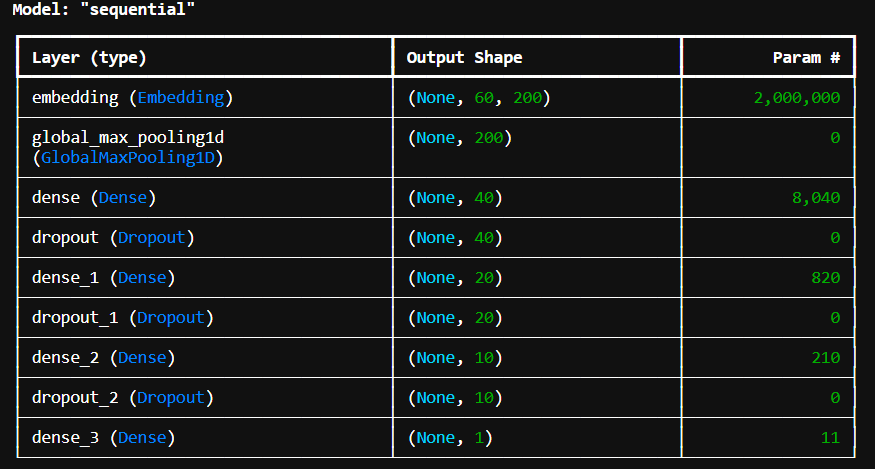

#### Visializing validation loss and validation accuracy
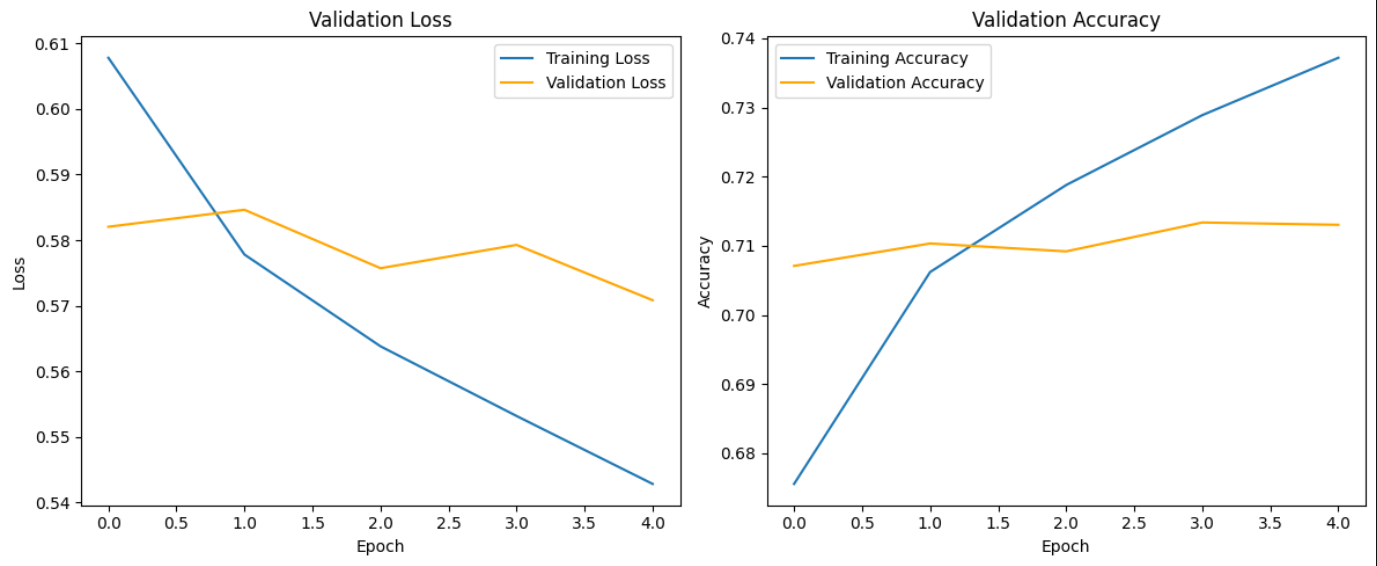

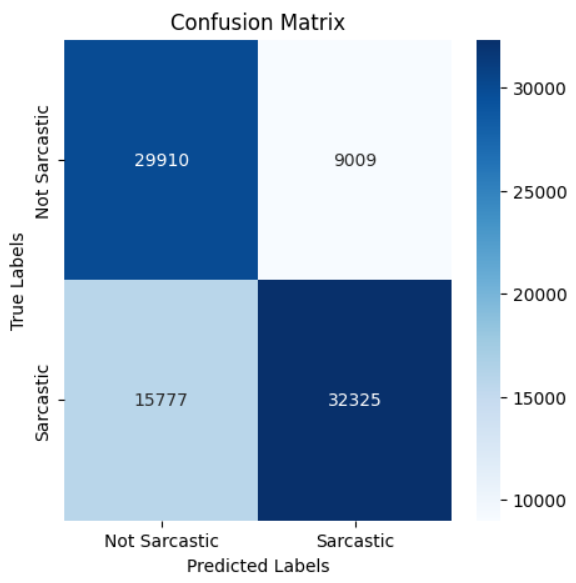

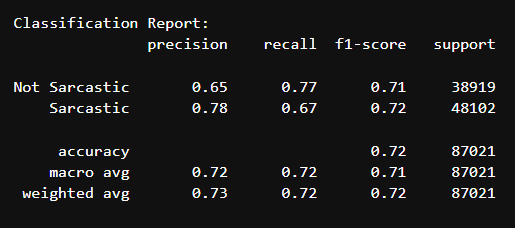

# Predicting if Comment is sarcastic or not


In [30]:
def clean_text(sentences):
    if isinstance(sentences, str):  # Check if the input is a string
        # convert text to lowercase 
        text = sentences.lower() 
        # remove text in square brackets 
        text = re.sub(r'\[.*?\]', '', text) 
        # remove alphanumeric characters
        text = re.sub(r'\w*\d\w*', '', text)
        return text
    else:
        return np.nan  # Return NaN for non-string values

In [31]:
import pickle

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


In [32]:
vocab_size = 10000

# Embedding dimension value 
embedding_dim = 200

# Max length of sentence 
max_length = 60

# pad_sequences arg 
padding_type = 'post'

# Unknow words = <OOV> 
oov_tok = '<OOV>'

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer 
while True: 
	# Prompt the user to input a headline or exit 
	user_input = input( 
		"Enter a sentence for prediction (or type 'exit' to quit): ") 

	# Check if the user wants to exit 
	if user_input.lower() == 'exit': 
		break

	# Clean and preprocess user input 
	cleaned_input = clean_text(user_input) 
	tokenized_input = tokenizer.texts_to_sequences( 
		[cleaned_input]) # Tokenize the cleaned text 
	padded_input = pad_sequences( 
		tokenized_input, maxlen=max_length, padding=padding_type) # Pad the tokenized text 

	# Predict sarcasm 
	prediction = model.predict(padded_input) 

	# Print the prediction result 
	if prediction >= 0.5: 
		print(f"sentence: {user_input}\nPrediction: Sarcastic") 
	else: 
		print(f"sentence: {user_input}\nPrediction: Not Sarcastic") 


Enter a sentence for prediction (or type 'exit' to quit):  Oh great, another meeting that could have been an email.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
sentence: Oh great, another meeting that could have been an email.
Prediction: Sarcastic


Enter a sentence for prediction (or type 'exit' to quit):  exit


#### Example of list of input texts for prediction
"Oh great, another meeting that could have been an email.",

"Thanks for helping me with the presentation.",

"The weather has been beautiful this week.",

"I appreciate all the hard work you put into this project.",#

"I enjoyed the movie we watched last night.",

"I just love when people don't use their turn signals.",

"Just what I needed, more work to do over the weekend.", 

"Oh, wonderful, it's raining just when I forgot my umbrella.",

"The sky is clear and blue today.",

"The project meeting went well, and we made a lot of progress."